In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [14]:
base_dir = r"C:\Users\Flavio Ruvalcaba\Documents\Escuela\Universidad\7_Semestre\inputData\faces"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [15]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.2,
							zoom_range = 0.2,
							horizontal_flip = True,)
							
val_datagen = ImageDataGenerator(1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 20,
							class_mode ='binary')


val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (150,150),
							batch_size =20,
							class_mode= 'binary')

Found 19016 images belonging to 2 classes.
Found 2719 images belonging to 2 classes.


In [17]:
conv_base= VGG16(weights='imagenet',
								include_top=False,
								input_shape = (150,150,3))

In [18]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
75/75 [==============================] - ETA: 0s - loss: 0.5986 - acc: 0.6780

C:\Users\Flavio Ruvalcaba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


75/75 [==============================] - 87s 1s/step - loss: 0.5986 - acc: 0.6780 - val_loss: 3.0799 - val_acc: 0.7300
Epoch 2/10
75/75 [==============================] - 83s 1s/step - loss: 0.5020 - acc: 0.7600 - val_loss: 2.2988 - val_acc: 0.7980
Epoch 3/10
75/75 [==============================] - 72s 962ms/step - loss: 0.4852 - acc: 0.7680 - val_loss: 2.4068 - val_acc: 0.8020
Epoch 4/10
75/75 [==============================] - 64s 859ms/step - loss: 0.4469 - acc: 0.8073 - val_loss: 2.4702 - val_acc: 0.8120
Epoch 5/10
75/75 [==============================] - 65s 863ms/step - loss: 0.4222 - acc: 0.8140 - val_loss: 2.5745 - val_acc: 0.8440
Epoch 6/10
75/75 [==============================] - 63s 839ms/step - loss: 0.4174 - acc: 0.8160 - val_loss: 3.0187 - val_acc: 0.8380
Epoch 7/10
75/75 [==============================] - 65s 867ms/step - loss: 0.4255 - acc: 0.8027 - val_loss: 3.2679 - val_acc: 0.8420
Epoch 8/10
75/75 [==============================] - 62s 825ms/step - loss: 0.4308 - ac

C:\Users\Flavio Ruvalcaba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


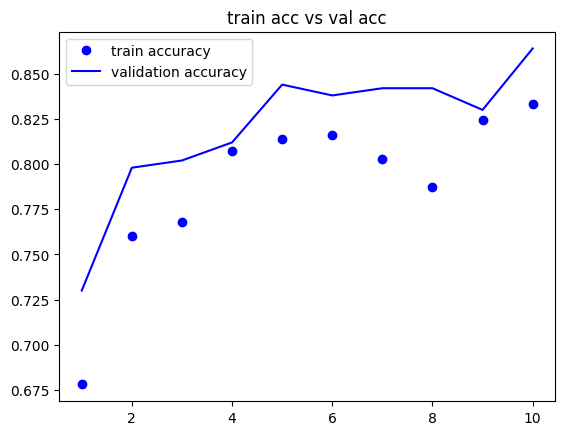

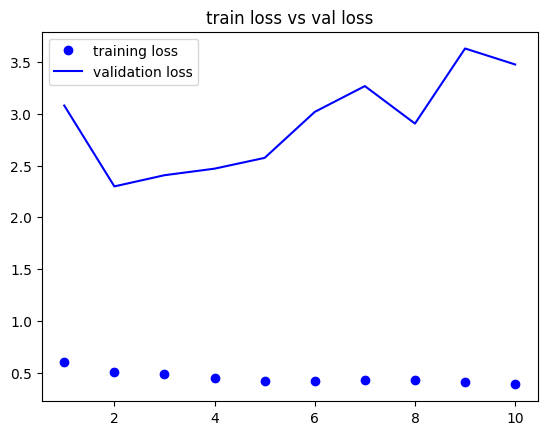

In [19]:

history = model.fit(train_generator, 
				steps_per_epoch = 75,  
				epochs = 10, 
				validation_data = val_generator, 
				validation_steps = 25)
				
model.save('vgg_man_woman_model.h5')
model.save('vgg_man_woman_model.keras')
			
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()



In [20]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)


Found 5432 images belonging to 2 classes.
25/25 [==============================] - 15s 611ms/step - loss: 3.4980 - acc: 0.8320

test acc :
 0.8320000171661377
